<a href="https://colab.research.google.com/github/SJhawar1010/Machine-Learning/blob/main/Lab7_2348554.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Datasets/employee_data (1) 2.csv")

In [5]:
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [6]:
data.describe()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,tenure
count,14249.000000,2058.0,12717.000000,14249.000000,300.0,14068.000000,14068.000000
mean,199.795775,1.0,0.718477,3.773809,1.0,0.621295,3.497228
std,50.998714,0.0,0.173062,1.253126,0.0,0.250469,1.460917
min,49.000000,1.0,0.316175,1.000000,1.0,0.040058,2.000000
25%,155.000000,1.0,0.563866,3.000000,1.0,0.450390,3.000000
50%,199.000000,1.0,0.724939,4.000000,1.0,0.652527,3.000000
75%,245.000000,1.0,0.871358,5.000000,1.0,0.824951,4.000000
max,310.000000,1.0,1.000000,7.000000,1.0,1.000000,10.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [8]:
data.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [9]:
data['filed_complaint'].fillna(0,inplace=True)
data['last_evaluation'].fillna(data['last_evaluation'].mean(),inplace=True)
data['recently_promoted'].fillna(0,inplace=True)
data['satisfaction'].fillna(data['satisfaction'].mode()[0],inplace=True)
data=data.dropna()

In [10]:
from sklearn.preprocessing import LabelEncoder
for col in ['department','salary','status']:
  le=LabelEncoder()
  data[col]=le.fit_transform(data[col])
data.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,2,0.0,0.932868,4,0.0,1,0.829896,1,5.0
1,232,10,0.0,0.718477,3,0.0,1,0.834544,0,2.0
2,184,9,0.0,0.788830,3,0.0,2,0.834988,0,3.0
3,206,9,0.0,0.575688,4,0.0,1,0.424764,0,2.0
4,249,9,0.0,0.845217,3,0.0,1,0.779043,0,3.0


In [11]:
data.describe()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
count,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000,13359.000000
mean,201.203159,6.055393,0.145071,0.718503,3.807845,0.021334,1.345460,0.622194,0.236620,3.504155
std,49.930370,3.551463,0.352185,0.164458,1.235721,0.144500,0.624924,0.250476,0.425023,1.473922
min,96.000000,0.000000,0.000000,0.316175,2.000000,0.000000,0.000000,0.040058,0.000000,2.000000
25%,156.000000,2.000000,0.000000,0.577606,3.000000,0.000000,1.000000,0.451782,0.000000,3.000000
50%,200.000000,8.000000,0.000000,0.718477,4.000000,0.000000,1.000000,0.654061,0.000000,3.000000
75%,245.000000,9.000000,0.000000,0.857885,5.000000,0.000000,2.000000,0.825668,0.000000,4.000000
max,310.000000,10.000000,1.000000,1.000000,7.000000,1.000000,2.000000,1.000000,1.000000,10.000000


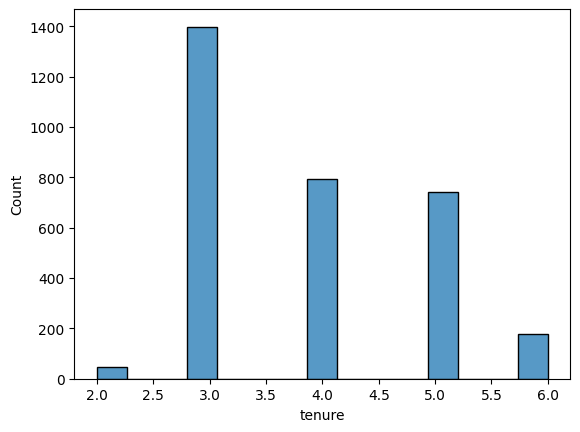

<Axes: xlabel='tenure', ylabel='Count'>

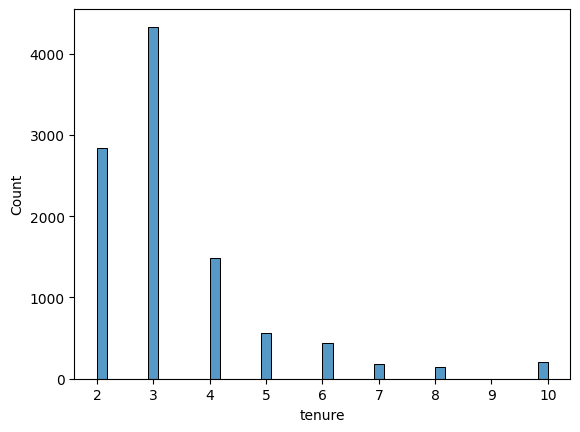

In [12]:
import seaborn as sns
left=data[data["status"]==1]
employed=data[data["status"]==0]
sns.histplot(left["tenure"])
plt.show()
sns.histplot(employed["tenure"])

<Axes: xlabel='status', ylabel='satisfaction'>

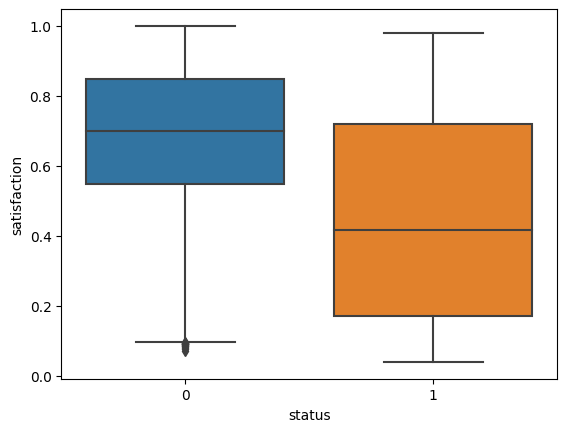

In [13]:
sns.boxplot(y=data['satisfaction'],x=data['status'])

<Axes: ylabel='status'>

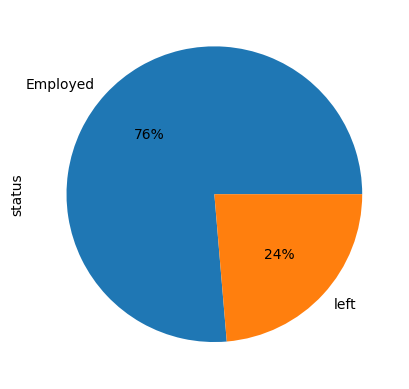

In [14]:
data['status'].value_counts().plot(kind="pie",labels=["Employed","left"],autopct='%1.0f%%')

<Axes: xlabel='satisfaction', ylabel='last_evaluation'>

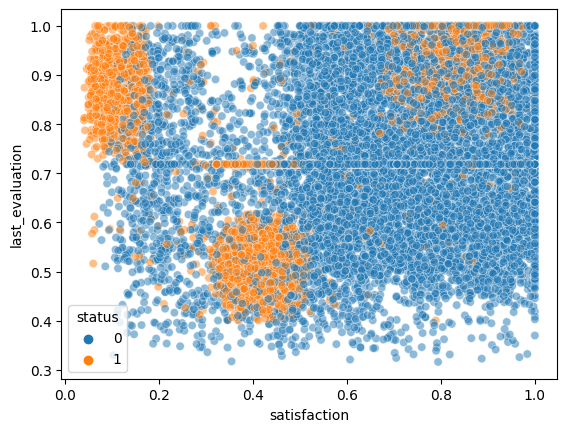

In [15]:
sns.scatterplot(x=data['satisfaction'],y=data['last_evaluation'],hue=data['status'],alpha=0.5)

In [16]:
X=data.drop(columns='status',axis=1)
y=data['status']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train,y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [19]:
from sklearn.metrics import accuracy_score
y_pred = clf_gini.predict(X_test)
print("Test data accuracy using gini impurity:",accuracy_score(y_true = y_test, y_pred=y_pred))
y_pred = clf_entropy.predict(X_test)
print("Test data accuracy using entropy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Test data accuracy using gini impurity: 0.9663173652694611
Test data accuracy using entropy: 0.968188622754491


<BarContainer object of 9 artists>

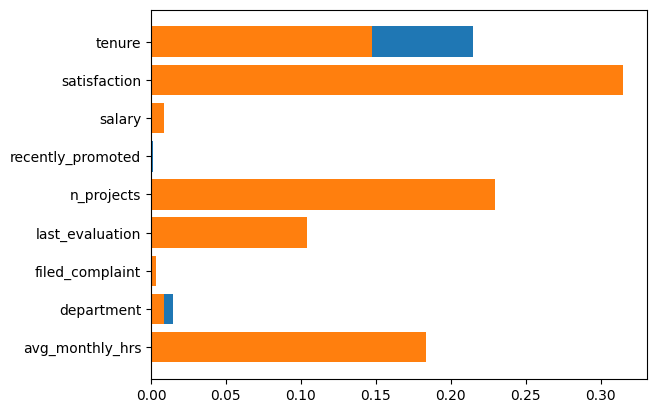

In [20]:
plt.barh(X.columns,clf_entropy.feature_importances_)
plt.barh(X.columns,clf_gini.feature_importances_)

In [21]:
print("entropy tree depth:"+str(clf_entropy.get_depth()))
print("gini tree depth:"+str(clf_gini.get_depth()))

entropy tree depth:29
gini tree depth:21


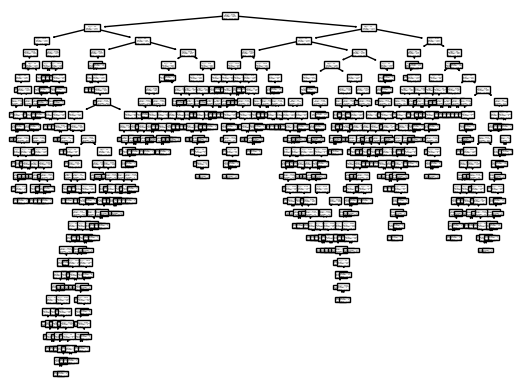

In [22]:
from sklearn import tree
tree.plot_tree(clf_entropy)
plt.show()


In [23]:
X=data.drop(columns=['status','salary','recently_promoted','filed_complaint','department'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)
clf = DecisionTreeClassifier(max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred),clf.get_depth())

Test data accuracy: 0.969311377245509 5


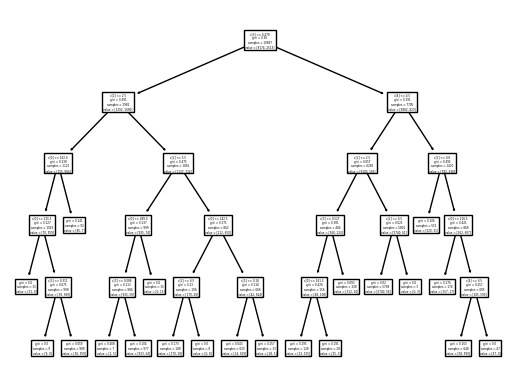

In [24]:
tree.plot_tree(clf)
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2024
           1       0.96      0.91      0.93       648

    accuracy                           0.97      2672
   macro avg       0.97      0.95      0.96      2672
weighted avg       0.97      0.97      0.97      2672



In [26]:
clf_gini = DecisionTreeClassifier(criterion="gini",max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf_gini.fit(X_train,y_train)
clf_entropy = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=20,min_samples_leaf=2,max_depth=5)
clf_entropy.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
print("Test data accuracy using gini impurity:",accuracy_score(y_true = y_test, y_pred=y_pred))
y_pred1 = clf_entropy.predict(X_test)
print("Test data accuracy using entropy:",accuracy_score(y_true = y_test, y_pred=y_pred1))

Test data accuracy using gini impurity: 0.969685628742515
Test data accuracy using entropy: 0.9674401197604791


In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[2001,   23],
       [  58,  590]])

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
confusion_matrix1

array([[2001,   23],
       [  64,  584]])

<BarContainer object of 5 artists>

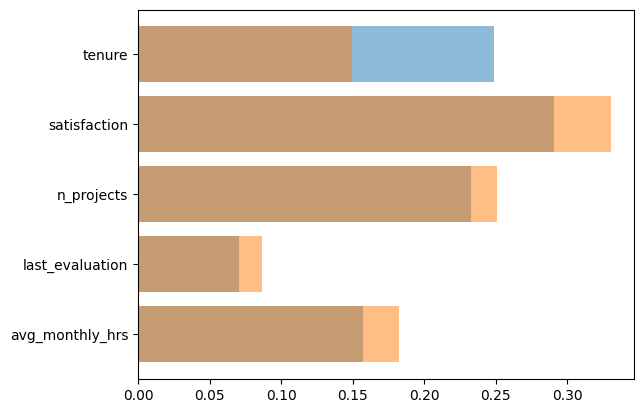

In [29]:
plt.barh(X.columns,clf_entropy.feature_importances_,alpha=0.5)
plt.barh(X.columns,clf_gini.feature_importances_,alpha=0.5)